# The NLP Grimoire

## Chapter 2 - How to Collect, Parse, and Clean Text Data?

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/EshbanTheLearner/the-NLP-Grimoire/blob/main/Chapter-2/Chapter-2.ipynb)

# Data Collection

## Data Scrapping with BeautifulSoup

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

url = "https://en.wikipedia.org/wiki/The_Office_(American_TV_series)"
res = requests.get(url)

soup = BeautifulSoup(res.text, "html.parser")
tables = soup.find("table", {'class':"wikitable"})
seasons_df = pd.read_html(str(tables))[0]
seasons_df.head()

,Season,Percentage,Rating,Critical consensus
0,1,69% (39 reviews),7.74/10,"""The Office quickly distinguishes itself from ..."
1,2,100% (13 reviews),8.43/10,"""The Office undergoes a steep improvement in i..."
2,3,100% (13 reviews),8.44/10,"""The Office hits its full stride in a raucous ..."
3,4,83% (12 reviews),7.7/10,"""Dunder Mifflin makes some awkward choices whi..."
4,5,100% (16 reviews),8.29/10,"""The Office continues to power on like a trust..."


# Data Parsing

## Reading from Text and Flat Files

In [2]:
with open("wikipedia-sample-text.txt") as f:
  lines = f.readlines()
  print(lines)

['Since the so-called "statistical revolution"[15][16] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning. The machine-learning paradigm calls instead for using statistical inference to automatically learn such rules through the analysis of large corpora (the plural form of corpus, is a set of documents, possibly with human or computer annotations) of typical real-world examples.\n', '\n', 'Many different classes of machine-learning algorithms have been applied to natural-language-processing tasks. These algorithms take as input a large set of "features" that are generated from the input data. Increasingly, however, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to each input feature (complex-valued embeddings,[17] and neural networks in general have also been proposed, for e.g. speech[18]). Such models have the advantage that they can express the 

In [3]:
with open("wikipedia-sample-text.txt") as f:
  lines = f.readlines()
  for x in lines:
    line = x.split("\n")
    print(line)

['Since the so-called "statistical revolution"[15][16] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning. The machine-learning paradigm calls instead for using statistical inference to automatically learn such rules through the analysis of large corpora (the plural form of corpus, is a set of documents, possibly with human or computer annotations) of typical real-world examples.', '']
['', '']
['Many different classes of machine-learning algorithms have been applied to natural-language-processing tasks. These algorithms take as input a large set of "features" that are generated from the input data. Increasingly, however, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to each input feature (complex-valued embeddings,[17] and neural networks in general have also been proposed, for e.g. speech[18]). Such models have the advantage that they can expres

##PDF

In [4]:
!pip install slate3k

In [5]:
import slate3k as slate

with open('dummy.pdf', 'rb') as f:
    extracted_text = slate.PDF(f)
print("".join(extracted_text))

Dummy PDF file




## Word Document

In [6]:
!pip install python-docx

In [7]:
import docx

def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

getText("wikipedia-sample-text.docx")

'Since the so-called "statistical revolution"[15][16] in the late 1980s and mid-1990s, much natural language processing research has relied heavily on machine learning. The machine-learning paradigm calls instead for using statistical inference to automatically learn such rules through the analysis of large corpora (the plural form of corpus, is a set of documents, possibly with human or computer annotations) of typical real-world examples.\n\nMany different classes of machine-learning algorithms have been applied to natural-language-processing tasks. These algorithms take as input a large set of "features" that are generated from the input data. Increasingly, however, research has focused on statistical models, which make soft, probabilistic decisions based on attaching real-valued weights to each input feature (complex-valued embeddings,[17] and neural networks in general have also been proposed, for e.g. speech[18]). Such models have the advantage that they can express the relative 

## JSON

In [8]:
import json
from pprint import pprint

f = open('sample.json',)
data = json.load(f)
pprint(data)
f.close()

{'address': {'city': 'San Diego', 'state': 'CA', 'streetAddress': '101'},
 'age': 28,
 'firstName': 'Joe',
 'gender': 'male',
 'lastName': 'Jackson',
 'phoneNumbers': [{'number': '7349282382', 'type': 'home'}]}


# Data Preprocessing

In [9]:
import nltk; nltk.download('punkt'); nltk.download('stopwords'); nltk.download('wordnet')
from nltk.corpus import twitter_samples  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [11]:
df_positives = pd.DataFrame(twitter_samples.strings('positive_tweets.json'))
df_negatives = pd.DataFrame(twitter_samples.strings('negative_tweets.json'))

df_positives.columns = ["tweets"]
df_negatives.columns = ["tweets"]
df_positives.shape, df_negatives.shape

((5000, 1), (5000, 1))

In [12]:
df_positives.head()

,tweets
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...
1,@Lamb2ja Hey James! How odd :/ Please call our...
2,@DespiteOfficial we had a listen last night :)...
3,@97sides CONGRATS :)
4,yeaaaah yippppy!!! my accnt verified rqst has...


## Regular Expressions

In [13]:
import re

def clean_text(text_str):
  text_str = re.sub(r'^RT[\s]+', '', text_str) # Removes 'RT' tag from the tweet
  text_str = re.sub(r'https?:\/\/.*[\r\n]*', '', text_str) # Removes hyperlinkls, starting with https
  text_str = re.sub(r'#', '', text_str) # Removes the '#'
  text_str = re.sub(r'[0-9]', '', text_str) # Removes all numerics
  text_str = re.sub(r'[^A-Za-z0-9 ]+','',text_str) # Removes everything except alphabets and numerics
  return text_str

df_positives["clean_tweets"] = df_positives["tweets"].apply(lambda x: clean_text(x))
df_negatives["clean_tweets"] = df_negatives["tweets"].apply(lambda x: clean_text(x))

df_positives["tweets"][0], df_positives["clean_tweets"][0]

('#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 'FollowFriday FranceInte PKuchly MilipolParis for being top engaged members in my community this week ')

## Lower Casing

In [14]:
df_positives["clean_tweets"] = df_positives["clean_tweets"].apply(lambda x: x.lower())
df_negatives["clean_tweets"] = df_negatives["clean_tweets"].apply(lambda x: x.lower())

df_positives["tweets"][0], df_positives["clean_tweets"][0]

('#FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)',
 'followfriday franceinte pkuchly milipolparis for being top engaged members in my community this week ')

## Tokenization

In [15]:
from nltk.tokenize import word_tokenize


df_positives["tokenized_tweets"] = df_positives["clean_tweets"].apply(lambda x: word_tokenize(x))
df_negatives["tokenized_tweets"] = df_negatives["clean_tweets"].apply(lambda x: word_tokenize(x))

df_positives["clean_tweets"][0], df_positives["tokenized_tweets"][0]

('followfriday franceinte pkuchly milipolparis for being top engaged members in my community this week ',
 ['followfriday',
  'franceinte',
  'pkuchly',
  'milipolparis',
  'for',
  'being',
  'top',
  'engaged',
  'members',
  'in',
  'my',
  'community',
  'this',
  'week'])

## Stopword Removal

In [16]:
from nltk.corpus import stopwords

def remove_stopwords(token_list):
  return " ".join([w for w in token_list if not w in stopwords.words('english')])

df_positives["clean_tweets"] = df_positives["tokenized_tweets"].apply(lambda x: remove_stopwords(x))
df_negatives["clean_tweets"] = df_negatives["tokenized_tweets"].apply(lambda x: remove_stopwords(x))

" ".join(df_positives["tokenized_tweets"][0]), df_positives["clean_tweets"][0]

('followfriday franceinte pkuchly milipolparis for being top engaged members in my community this week',
 'followfriday franceinte pkuchly milipolparis top engaged members community week')

## Text Normalization

### Lemmatization

In [17]:
from nltk.stem import WordNetLemmatizer

def lemmatize_text(text_str):
  lemmatizer = WordNetLemmatizer()
  return " ".join([lemmatizer.lemmatize(w) for w in text_str.split(" ")])

df_positives["lemmatized_tweets"] = df_positives["clean_tweets"].apply(lambda x: lemmatize_text(x))
df_negatives["lemmatized_tweets"] = df_negatives["clean_tweets"].apply(lambda x: lemmatize_text(x))

df_positives["clean_tweets"][0], df_positives["lemmatized_tweets"][0]

('followfriday franceinte pkuchly milipolparis top engaged members community week',
 'followfriday franceinte pkuchly milipolparis top engaged member community week')

# Wordcloud

## Positive Tweets

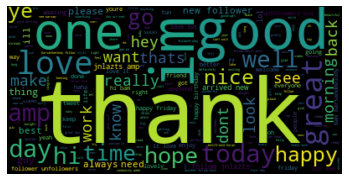

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

positive_tweets_text = " ".join(df_positives["lemmatized_tweets"].tolist())
wordcloud = WordCloud().generate(positive_tweets_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

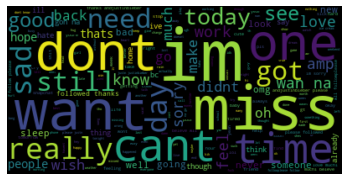

In [19]:
negative_tweets_text = " ".join(df_negatives["lemmatized_tweets"].tolist())
wordcloud = WordCloud().generate(negative_tweets_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()